In [26]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
#Loading Citibike Data
#os.system('curl -O https://s3.amazonaws.com/tripdata/201609-citibike-tripdata.zip')
#os.system('unzip 201609-citibike-tripdata.zip')
df = pd.read_csv('201609-citibike-tripdata.csv')
df["age"] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber')] #Adding age variable into data
df = df.dropna(subset=['birth year'])
Age = df["age"]
Age = Age.dropna()

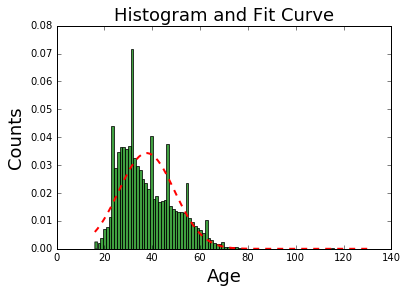

In [45]:
from scipy.stats import norm
(mu, sigma) = norm.fit(Age)
n, bins, patches = plt.hist(Age, 100, normed=1, facecolor='green', alpha=0.75)
y = pl.normpdf(bins, mu, sigma)
l = pl.plot(bins, y, 'r--', linewidth=2)
pl.xlabel('Age', fontsize = 18)
pl.ylabel('Counts', fontsize = 18)
pl.title('Histogram and Fit Curve',fontsize = 18)

The distribution is left-skewed and does not seem to fit the gaussian perfectly. However, It might still be a distribution drawn by a gaussian distribution. 

## KS Test

$H_0$ : The age distribution of Citibike subscribers in September 2016 is drawn from gaussian distribution with a mean of 37.6764255312 year and standard deviation of 11.6243488656.

$H_a$ : The age distribution of Citibike subcribers in Septermber 2016 is not drawn from the gaussian distribution

Use $\alpha$ = 0.05

In [28]:
from scipy.stats import kstest
kstest(Age, "norm", args=(mu, sigma))

KstestResult(statistic=0.10886008432288197, pvalue=0.0)

### Since p-value is 0, reject the null hypothesis that the age distribution is drawn from the gaussian distribution with said parameters. 

## Anderson-Darling Test

$H_0$ : The age distribution of Citibike subscribers in September 2016 is drawn from a gaussian distribution

$H_a$ : The age distribution of Citibike subcribers in Septermber 2016 is not drawn from a gaussian distribution

Use $\alpha$ = 0.05

In [43]:
from scipy.stats import anderson
anderson(Age)[1][2] < anderson(Age)[2][2]

True

## On a 0.05 significance level, reject the null hypothesis that the age distribution is drawn from the gaussian distribution. 

## Testing goodness of fit using Logistic distribution
## KS test

$H_0$ : The age distribution of Citibike subscribers in September 2016 is drawn from a logistic distribution with a mean of 37.6764255312 year and standard deviation of 11.6243488656

$H_a$ : The age distribution of Citibike subcribers in Septermber 2016 is not drawn from the logistic distribution

Use $\alpha$ = 0.05

In [83]:
kstest(Age, 'logistic')

KstestResult(statistic=0.99999988746483792, pvalue=0.0)

## Since p-value is 0, on a 0.05 significance level, reject the null hypothesis that the age distribution is drawn from the logistic distribution. 

## Anderson-Darling Test

$H_0$ : The age distribution of Citibike subscribers in September 2016 is drawn from a logistic distribution

$H_a$ : The age distribution of Citibike subcribers in Septermber 2016 is not drawn from a logistic distribution

Use $\alpha$ = 0.05

In [78]:
anderson(Age,'logistic')[1][2] < anderson(Age,'logistic')[2][2]

True

## On a 0.05 significance level, reject the null hypothesis that the age distribution is drawn from a logistic distribution. 